In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

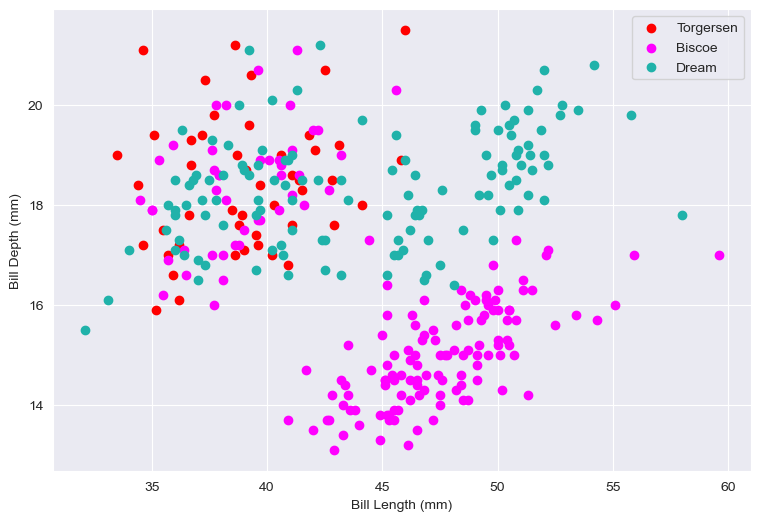

In [2]:
# TODO: Adjust this visualization

penguins = sns.load_dataset('penguins').dropna()

colors = dict(zip(penguins['island'].unique(),
                  ["red", "magenta", "lightseagreen"]))  # Assign colors to each species for visualization

fig, ax = plt.subplots(figsize=(9, 6))
for s, c in colors.items():
    plot_i = penguins[penguins.island == s]  # Plot each species with its corresponding color
    ax.scatter(plot_i.bill_length_mm, plot_i.bill_depth_mm, color=c, label=s)
ax.set_xlabel('Bill Length (mm)')
ax.set_ylabel('Bill Depth (mm)')
ax.legend()
plt.show()

In [3]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [4]:
penguins = sns.load_dataset('penguins').dropna()
penguins = penguins[penguins.species != 'Adelie']
le = LabelEncoder()
penguins['species'] = le.fit_transform(penguins['species'])
penguins['sex'] = le.fit_transform(penguins['sex'])
penguins['island'] = le.fit_transform(penguins['island'])

X = penguins.drop('island', axis=1)
y = penguins['island']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [6]:
tree_clf = DecisionTreeClassifier()
svm_clf = SVC()
rnd_clf = RandomForestClassifier()

voting_clf = VotingClassifier(estimators=[("rf", rnd_clf), ("svm", svm_clf)], voting = "hard")

In [7]:
svm_clf.fit(X_train, y_train)
svm_y_predict = svm_clf.predict(X_test)
print(f"svm accuracy: {accuracy_score(y_test, svm_y_predict)}")

tree_clf.fit(X_train, y_train)
tree_y_predict = tree_clf.predict(X_test)
print(f"tree accuracy: {accuracy_score(y_test, tree_y_predict)}")


rnd_clf.fit(X_train, y_train)
rnd_y_predict = rnd_clf.predict(X_test)
print(f"random forest accuracy: {accuracy_score(y_test, rnd_y_predict)}")

voting_clf.fit(X_train, y_train)
y_predict = voting_clf.predict(X_test)
print(f"voting classifier accuracy: {accuracy_score(y_test, y_predict)}")

svm accuracy: 0.9361702127659575
tree accuracy: 1.0
random forest accuracy: 1.0
voting classifier accuracy: 0.9574468085106383
